In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/Users/chidam/Desktop/burritos_dataset.csv")

In [3]:
df.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [4]:
len(df)

421

In [5]:
train=pd.read_csv("/Users/chidam/Desktop/burritos_train_set.csv")

In [6]:
train.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Donato's taco shop,California,1/18/16,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Oscar's Mexican food,California,1/24/16,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Oscar's Mexican food,Carnitas,1/24/16,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Oscar's Mexican food,Carne asada,1/24/16,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Pollos Maria,California,1/27/16,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [13]:
#Total number of features
len(train.columns)

65

In [12]:
#Let's find out whether any values missing in the train set. If yes, then let's get the percent of missing values in each
#column

percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Location,Location,0.000000
Burrito,Burrito,0.000000
Date,Date,0.000000
Neighborhood,Neighborhood,74.581940
Address,Address,75.919732
...,...,...
Sushi,Sushi,99.331104
Avocado,Avocado,95.652174
Corn,Corn,99.331104
Zucchini,Zucchini,99.665552


In [21]:
missing_value_df.loc[missing_value_df["percent_missing"]<10, "column_name"]

Location            Location
Burrito              Burrito
Date                    Date
Cost                    Cost
Hunger                Hunger
Tortilla            Tortilla
Temp                    Temp
Meat                    Meat
Fillings            Fillings
Meat:filling    Meat:filling
Uniformity        Uniformity
Salsa                  Salsa
Synergy              Synergy
Wrap                    Wrap
Reviewer            Reviewer
Great                  Great
Name: column_name, dtype: object

In [ ]:
These 12 columns have less than 10% values missing and so starting with them


Cost                    Cost
Hunger                Hunger
Tortilla            Tortilla
Temp                    Temp
Meat                    Meat
Fillings            Fillings
Meat:filling    Meat:filling
Uniformity        Uniformity
Salsa                  Salsa
Synergy              Synergy
Wrap                    Wrap
Great                  Great

In [ ]:
Observation:
In some columns there are many values missing accounting to more than 90%

In [ ]:
Strategy:
    
Because there are many columns with significant number of values missing, lets just focus on columns with only a fewer 
values missing. For now I am going to focus on the following columns:



In [16]:
#

train["Great"] = train["Great"].astype(int)


In [19]:
train["Great"].value_counts()

0    176
1    123
Name: Great, dtype: int64

In [ ]:
Cost                    Cost
Hunger                Hunger
Tortilla            Tortilla
Temp                    Temp
Meat                    Meat
Fillings            Fillings
Meat:filling    Meat:filling
Uniformity        Uniformity
Salsa                  Salsa
Synergy              Synergy
Wrap                    Wrap
Great                  Great

In [24]:


selected=["Cost", "Hunger", "Tortilla", "Temp", "Meat", "Fillings", "Meat:filling", "Uniformity", "Salsa", "Synergy", "Wrap"]




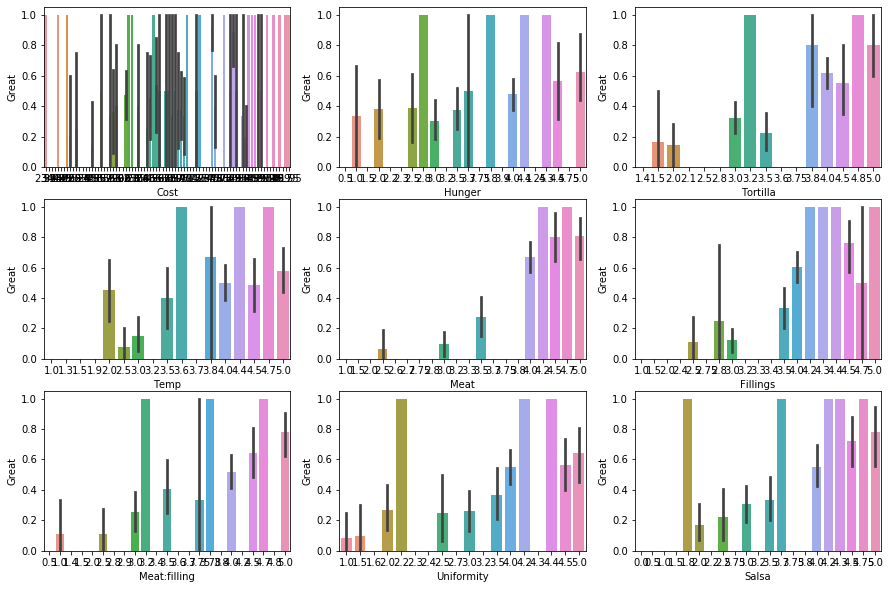

In [31]:
Deciding on visualization!

How can you decide on which visualization to go far? Well, it is good to start with a goal. My goal: is to check how 
the features behave with re to target column. So I decided to plot the features Vs. target. Although the bar plot shows 
confidence interval and some grouping after a range for some features, it is clearly confusing. That directs me to plotting
the much clearer line plot below.

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(selected, ax.flatten()):
    sns.barplot(x=var, y='Great', data=train, ax=subplot)

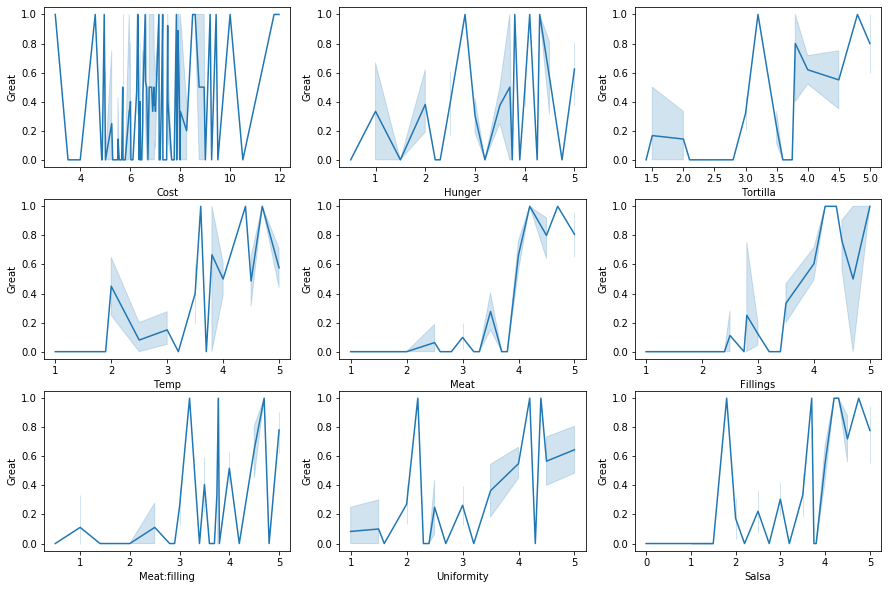

In [30]:
#Let's see what the realtionship looks like between the features and our target variable, "Great"
#This solves my purpose

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(selected, ax.flatten()):
    sns.lineplot(x=var, y='Great', data=train, ax=subplot)

In [ ]:
Observation:
Clear pattern exists amongst following features Vs. target column: 
    
Hunger: Customers with hunger level at 3 and above have seemed to have rated the burriot great.
Tortilla: The quality of tortilla played a significant role in rating a burrito great or not.
Temp: No one would like a cold burrito :) temperature mattered.
Meat: Meat quality was a significant indicator too.    
Fillings: The quality of a balanced filling mattered.
Meat:filling: The ratio between meat and non-meat turns out to be a significant indicator too.

------------------------------------------------------------------------------------------------------------       

No clear pattern: What about other features?
    
Cost Vs. Great: Although the data points for cost are heavily clustered between 5 and 8, a clear pattern does not exist to 
declare a win between low and high cost.
    
Customers that do not like a variety in salsa (salsa ratings less than 3) rated burritos great and so did the customers 
that like a variety in salsa (salsa ratings greater than 3). So customers preferences seemed to have affected the 
salsa ratings.

The similar explanation goes true for uniformity (bites full of sour cream and cheese with meat).



In [ ]:
What about the categorical features we have?



In [38]:
train["Location"].values.tolist()

["Donato's taco shop",
 "Oscar's Mexican food",
 "Oscar's Mexican food",
 "Oscar's Mexican food",
 'Pollos Maria',
 'Pollos Maria',
 "Nico's Taco Shop",
 "Nico's Taco Shop",
 'Los Primos Mexican Food',
 "JV's Mexican Food",
 "JV's Mexican Food",
 "Tony's Fresh Mexican Food",
 "Tony's Fresh Mexican Food",
 "Tony's Fresh Mexican Food",
 "Tony's Fresh Mexican Food",
 'Taco Stand',
 'Taco Stand',
 "Graciela's Taco Shop",
 "Graciela's Taco Shop",
 "Rigoberto's Taco Shop La Jolla",
 "Rigoberto's Taco Shop La Jolla",
 "Lolita's taco shop",
 "Lolita's taco shop",
 'Taco Stand',
 'Taco Stand',
 "Lola's 7 Up Market & Deli",
 "Lola's 7 Up Market & Deli",
 "Colima's Mexican Food",
 "Colima's Mexican Food",
 "Colima's Mexican Food",
 "Rigoberto's Taco Shop",
 "Rigoberto's Taco Shop",
 "Raul's Mexican food",
 "Raul's Mexican food",
 'El Zarape',
 'El Zarape',
 'El Zarape',
 'El Zarape',
 'El Indio',
 'Taco stand',
 'Taco stand',
 'Qdoba Mexican Grill, Seatac Airport',
 'Cancun Mexican & Seafood',
 '

In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

encoder=OneHotEncoder()
# OneHotEncoder().fit_transform(x).toarray()

encoded =encoder.fit_transform(train["Location"].values.tolist())


AttributeError: 'list' object has no attribute 'reshape'

In [47]:
# encoded = pd.get_dummies(train["Location"])

In [48]:
# encoded

In [43]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [44]:
label_encoder.fit(train["Location"].tolist())

LabelEncoder()

In [46]:
transformed=label_encoder.transform(train["Location"].tolist())

In [49]:
encoded = pd.get_dummies(transformed)

In [50]:
encoded

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's now build a Baseline Logistic Regression Model with the above features and check for performance

#Logistic Regression Model does not accept input with missing values in them. Let's just replace the missing values in every 
#column using a simple technique of using mean of the column 
#(FYI: we call this technique of replacing missing values as imputation technique)





In [ ]:

selected=["Cost", "Hunger", "Tortilla", "Temp", "Meat", "Fillings", "Meat:filling", "Uniformity", "Salsa", "Synergy", "Wrap"]


train["Great"]


In [51]:


selected_df=train[["Cost", "Hunger", "Tortilla", "Temp", "Meat", "Fillings", "Meat:filling", "Uniformity", "Salsa", "Synergy", "Wrap"]]





In [52]:
y=train["Great"].values

In [53]:
selected_df.head()

,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap
0,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0
1,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0
2,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0
3,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0
4,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0


In [54]:
selected_df.isnull().sum() * 100 / len(selected_df)

Cost            2.006689
Hunger          0.334448
Tortilla        0.000000
Temp            5.016722
Meat            3.344482
Fillings        0.334448
Meat:filling    2.006689
Uniformity      0.668896
Salsa           6.688963
Synergy         0.668896
Wrap            0.668896
dtype: float64

In [59]:

selected_df=selected_df.apply(lambda x: x.fillna(x.mean()),axis=0)


In [60]:
selected_df.isnull().sum() * 100 / len(selected_df)

Cost            0.0
Hunger          0.0
Tortilla        0.0
Temp            0.0
Meat            0.0
Fillings        0.0
Meat:filling    0.0
Uniformity      0.0
Salsa           0.0
Synergy         0.0
Wrap            0.0
dtype: float64

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
X=selected_df.values

In [63]:
y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
model = LogisticRegression(random_state=0).fit(X, y)

In [65]:
#Let's get the validation set

validation_df=pd.read_csv("/Users/chidam/Desktop/burritos_validation_set.csv")

In [66]:
validation_df.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Rigoberto's Taco Shop,California,1/4/17,NaN,NaN,NaN,NaN,NaN,NaN,6.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Rigoberto's Taco Shop,Chile Relleno,1/4/17,NaN,NaN,NaN,NaN,NaN,NaN,6.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Los Tacos,Fusion,1/7/17,NaN,NaN,NaN,NaN,NaN,NaN,8.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Los Tacos,Local,1/7/17,NaN,NaN,NaN,NaN,NaN,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Taco Villa,Chicken,1/10/17,NaN,NaN,NaN,NaN,NaN,NaN,4.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [67]:
validation_df["Great"] = validation_df["Great"].astype(int)

In [68]:
y_valid=validation_df["Great"].values

In [69]:

selected_valid_df=validation_df[["Cost", "Hunger", "Tortilla", "Temp", "Meat", "Fillings", "Meat:filling", "Uniformity", "Salsa", "Synergy", "Wrap"]]





In [70]:
#Let's check the percent of values missing in the validation set

selected_valid_df.isnull().sum() * 100 / len(selected_valid_df)

Cost            1.176471
Hunger          2.352941
Tortilla        0.000000
Temp            5.882353
Meat            2.352941
Fillings        1.176471
Meat:filling    2.352941
Uniformity      0.000000
Salsa           2.352941
Synergy         0.000000
Wrap            0.000000
dtype: float64

In [71]:
selected_valid_df=selected_valid_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [72]:
selected_valid_df.isnull().sum() * 100 / len(selected_valid_df)

Cost            0.0
Hunger          0.0
Tortilla        0.0
Temp            0.0
Meat            0.0
Fillings        0.0
Meat:filling    0.0
Uniformity      0.0
Salsa           0.0
Synergy         0.0
Wrap            0.0
dtype: float64

In [73]:
X_valid=selected_valid_df.values

In [74]:
#Finding y_pred using validation set
y_pred_valid=model.predict(X_valid)


In [76]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, y_pred_valid)

0.8352941176470589

In [ ]:
--------------------------------------------------------------------------------------------------------------------------------

In [ ]:
Can we do better than this?

We have used a simple imputation technique using mean. That is not always a great solution because mean calculation 
ignores that correlation exists amongst features. Correlation is useful for prediction.


So let us try another imputation using K-Nearest Neighbor algorithm. SkLearn has a ...

In [77]:
import numpy as np
from sklearn.impute import KNNImputer


In [78]:


X_train_new=train[["Cost", "Hunger", "Tortilla", "Temp", "Meat", "Fillings", "Meat:filling", "Uniformity", "Salsa", "Synergy", "Wrap"]]





In [79]:
X_train_new.values

array([[6.49, 3.  , 3.  , ..., 4.  , 4.  , 4.  ],
       [5.45, 3.5 , 2.  , ..., 3.5 , 2.5 , 5.  ],
       [4.85, 1.5 , 3.  , ..., 3.  , 3.  , 5.  ],
       ...,
       [7.75, 4.  , 3.5 , ..., 2.2 , 3.3 , 4.5 ],
       [7.75, 4.  , 4.  , ..., 2.  , 2.  , 4.  ],
       [6.99, 3.7 , 3.6 , ...,  nan, 3.8 , 2.  ]])

In [81]:
imputer = KNNImputer(n_neighbors=2)
X_knn_imputed=imputer.fit_transform(X_train_new.values)

In [82]:
model1 = LogisticRegression(random_state=0).fit(X_knn_imputed, y)

In [83]:

valid_new=validation_df[["Cost", "Hunger", "Tortilla", "Temp", "Meat", "Fillings", "Meat:filling", "Uniformity", "Salsa", "Synergy", "Wrap"]]




In [86]:
# valid_new.values

valid_knn_imputed=imputer.fit_transform(valid_new.values)

In [87]:

ypred_valid_imputed=model1.predict(valid_knn_imputed)


In [88]:
accuracy_score(y_valid, ypred_valid_imputed)

0.8235294117647058

In [104]:
#Validation function

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    accuracy_score=cross_val_score(model, X, y, cv = kf)
    return accuracy_score.mean()

In [105]:
rmsle_cv(model)

0.8728813559322035

In [106]:
n_folds = 5

def rmsle_cv1(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    accuracy_score=cross_val_score(model1, X_valid, y_valid, cv = kf)
    return accuracy_score.mean()

In [107]:
rmsle_cv1(model)

0.8470588235294118

In [126]:
from sklearn.metrics import confusion_matrix

CM=confusion_matrix(y_valid, y_pred_valid)

In [127]:


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [128]:
TN, FN, TP, FP

(37, 4, 34, 10)

In [112]:
y_valid

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [114]:
validation_df["Great"].value_counts()

0    47
1    38
Name: Great, dtype: int64

In [ ]:
KNN imputer - not doing great

In [ ]:
--------------------------------------------------------------------------------------------------------------------------------

In [129]:
CM2=confusion_matrix(y_valid, ypred_valid_imputed)

In [130]:
TN = CM2[0][0]
FN = CM2[1][0]
TP = CM2[1][1]
FP = CM2[0][1]

In [131]:
TN, FN, TP, FP

(36, 4, 34, 11)

In [132]:
#Let's try standard scaler and see whether it improves performance

from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [135]:
model3 = LogisticRegression(random_state=0).fit(X_scaled, y)

In [136]:


scaler.fit(X_valid)
X_valid_scaled=scaler.transform(X_valid)

In [137]:
y_valid_scaled_pred=model3.predict(X_valid_scaled)

In [138]:
CM3=confusion_matrix(y_valid, y_valid_scaled_pred)

In [139]:
TN = CM3[0][0]
FN = CM3[1][0]
TP = CM3[1][1]
FP = CM3[0][1]

In [140]:
TN, FN, TP, FP

(45, 7, 31, 2)

In [141]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    accuracy_score=cross_val_score(model, X_scaled, y, cv = kf)
    return accuracy_score.mean()

In [142]:
rmsle_cv(model3)

0.8694915254237288

In [144]:
n_folds = 5

def rmsle_cv_2(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    accuracy_score=cross_val_score(model, X_valid_scaled, y_valid, cv = kf)
    return accuracy_score.mean()

In [145]:
rmsle_cv_2(model3)

0.8705882352941178

In [ ]:
--------------------------------------------------------------------------------------------------------------------------------

In [146]:
test=pd.read_csv("/Users/chidam/Desktop/burritos_test_set.csv")

In [147]:
len(test)

37

In [151]:
test["Great"].value_counts()

True     21
False    16
Name: Great, dtype: int64

In [150]:
y_test=test["Great"].values

In [152]:

test[selected].isnull().sum() * 100 / len(test[selected])


Cost            0.000000
Hunger          0.000000
Tortilla        0.000000
Temp            0.000000
Meat            5.405405
Fillings        2.702703
Meat:filling    2.702703
Uniformity      0.000000
Salsa           8.108108
Synergy         0.000000
Wrap            2.702703
dtype: float64

In [153]:
test[selected]=test[selected].apply(lambda x: x.fillna(x.mean()),axis=0)

In [154]:
test[selected].isnull().sum() * 100 / len(test[selected])

Cost            0.0
Hunger          0.0
Tortilla        0.0
Temp            0.0
Meat            0.0
Fillings        0.0
Meat:filling    0.0
Uniformity      0.0
Salsa           0.0
Synergy         0.0
Wrap            0.0
dtype: float64

In [155]:
X_test=test[selected].values

In [156]:

scaler.fit(X_test)
Xtest_scaled=scaler.transform(X_test)



In [157]:


selected_valid_df.head()


,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap
0,6.60,3.679518,4.0,4.5,4.000000,3.5,3.500000,5.0,1.5,3.50,4.5
1,6.60,3.679518,4.0,2.0,3.718675,4.0,3.681928,4.6,4.2,3.75,5.0
2,8.50,3.900000,3.0,4.5,4.100000,3.0,3.700000,4.0,4.3,4.20,5.0
3,7.90,4.000000,3.5,4.0,4.000000,3.0,4.000000,4.5,4.0,3.80,4.8
4,4.99,3.500000,2.5,4.5,3.000000,2.5,3.000000,3.0,2.0,2.00,4.0


In [162]:
len(selected_valid_df)

85

In [158]:
selected_df.head()

,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap
0,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0
1,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0
2,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0
3,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0
4,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0


In [161]:
len(selected_df)

299

In [159]:
X_combined = selected_df.append(selected_valid_df, ignore_index=True)

In [160]:
X_combined

,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap
0,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0
1,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0
2,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0
3,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0
4,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...
379,6.85,3.5,3.0,4.5,3.8,3.8,4.0,3.5,3.5,4.0,3.0
380,6.85,3.5,3.0,4.5,4.0,4.0,4.5,3.0,4.0,4.0,3.5
381,11.50,3.5,2.0,2.0,4.0,3.5,3.0,4.5,3.5,4.0,2.0
382,7.89,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.5,4.3,4.5


In [164]:
y_combined=train["Great"].append(validation_df["Great"], ignore_index=True)

In [165]:
y_combined

0      0
1      0
2      0
3      0
4      1
      ..
379    1
380    1
381    0
382    1
383    1
Name: Great, Length: 384, dtype: int64

In [166]:
X_combined.isnull().sum() * 100 / len(X_combined)

Cost            0.0
Hunger          0.0
Tortilla        0.0
Temp            0.0
Meat            0.0
Fillings        0.0
Meat:filling    0.0
Uniformity      0.0
Salsa           0.0
Synergy         0.0
Wrap            0.0
dtype: float64

In [167]:
clf=LogisticRegression(random_state=0).fit(X_combined.values, y_combined.values)

In [168]:
y_true_pred=clf.predict(X_test)

In [169]:
CM_test=confusion_matrix(y_test, y_true_pred)

In [170]:
TN = CM_test[0][0]
FN = CM_test[1][0]
TP = CM_test[1][1]
FP = CM_test[0][1]

In [171]:
TN, FN, TP, FP

(11, 4, 17, 5)

In [ ]:
True     21
False    16

In [ ]:
#Let's scale X_combined

In [172]:
scaler.fit(X_combined.values)
X_combined_scaled=scaler.transform(X_combined.values)



In [173]:
X_combined_scaled

array([[-3.73189758e-01, -6.19611088e-01, -6.18787097e-01, ...,
         7.27658738e-01,  4.77428686e-01,  8.19790367e-03],
       [-1.06453548e+00,  1.75995647e-03, -1.89013137e+00, ...,
         1.73703081e-01, -1.20288000e+00,  9.12059579e-01],
       [-1.46338878e+00, -2.48372422e+00, -6.18787097e-01, ...,
        -3.80252576e-01, -6.42777104e-01,  9.12059579e-01],
       ...,
       [ 2.95723531e+00,  1.75995647e-03, -1.89013137e+00, ...,
         1.73703081e-01,  4.77428686e-01, -1.79952545e+00],
       [ 5.57467945e-01,  6.23131001e-01,  6.52557180e-01, ...,
         1.73703081e-01,  8.13490423e-01,  4.60128742e-01],
       [ 5.57467945e-01,  1.86587309e+00,  1.92390146e+00, ...,
         1.83557005e+00,  1.59763448e+00, -8.95663772e-01]])

In [174]:
clf2=LogisticRegression(random_state=0).fit(X_combined_scaled, y_combined.values)

In [175]:
y_true_pred_scaled=clf.predict(Xtest_scaled)

In [176]:
CM_test_scaled=confusion_matrix(y_test, y_true_pred_scaled)

In [179]:
CM_test_scaled

array([[16,  0],
       [21,  0]])

In [177]:
TN = CM_test_scaled[0][0]
FN = CM_test_scaled[1][0]
TP = CM_test_scaled[1][1]
FP = CM_test_scaled[0][1]

In [178]:
TN, FN, TP, FP

(16, 21, 0, 0)

In [ ]:
True     21
False    16

In [180]:
clf2.coef_

array([[0.18706545, 0.1095031 , 0.46738551, 0.65273909, 1.36904854,
        1.36164596, 1.21514557, 0.0016578 , 0.3907089 , 1.61843403,
        0.11019191]])

In [ ]:
3. Greedy goal :) : To suggest the restaurants significant features to focus and maintain thereby improving their 
business
